# Regresión con MLP en el dataset Boston Housing
Este experimento compara distintas configuraciones de redes neuronales y funciones de pérdida para predecir el precio de viviendas en el área de Boston. Incluye comparación entre `MAE` y `MSE`, evaluación con `R²`, análisis de overfitting y exploración de arquitecturas.

## 1. Preparación del dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Comparación entre funciones de pérdida: MAE vs MSE

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(loss_fn):
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.01), loss=loss_fn, metrics=['mae','mse'])
    return model

model_mse = build_model('mse')
history_mse = model_mse.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

model_mae = build_model('mae')
history_mae = model_mae.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

## 3. Análisis de overfitting

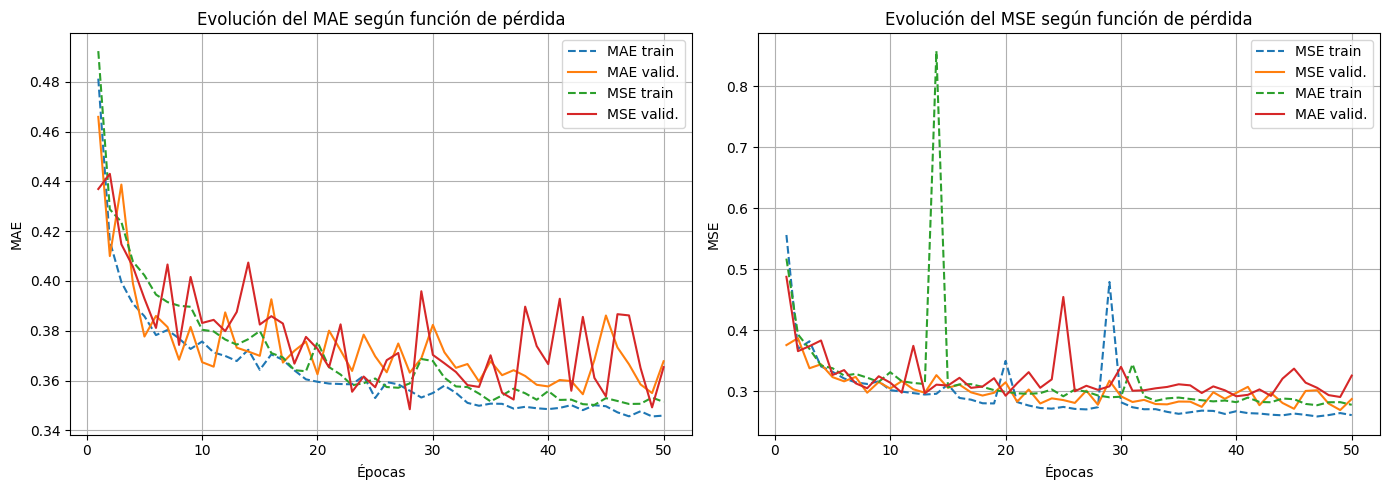

In [7]:
import matplotlib.pyplot as plt

# Extraer historiales
mse_mse_train = history_mse.history['loss']
mse_mse_val   = history_mse.history['val_loss']
mae_mse_train = history_mse.history['mae']
mae_mse_val   = history_mse.history['val_mae']

mae_mae_train = history_mae.history['loss']
mae_mae_val   = history_mae.history['val_loss']
mse_mae_train = history_mae.history['mse']
mse_mae_val   = history_mae.history['val_mse']
epochs    = range(1, len(mse_train) + 1)

# Crear 2 subplots horizontales (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

# 1) Evolución de la función de pérdida
ax1.plot(epochs, mae_mae_train, label='MAE train',    color='C0', linestyle='--')
ax1.plot(epochs, mae_mae_val,   label='MAE valid.',   color='C1')
ax1.plot(epochs, mae_mse_train, label='MSE train',    color='C2', linestyle='--')
ax1.plot(epochs, mae_mse_val,   label='MSE valid.',   color='C3')
ax1.set_title('Evolución del MAE según función de pérdida')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('MAE')
ax1.legend()
ax1.grid(True)

# 2) Evolución del MAE (solo MAE para comparar cómo varía)
ax2.plot(epochs, mse_mse_train, label='MSE train',    color='C0', linestyle='--')
ax2.plot(epochs, mse_mse_val,   label='MSE valid.',   color='C1')
ax2.plot(epochs, mse_mae_train, label='MAE train',    color='C2', linestyle='--')
ax2.plot(epochs, mse_mae_val,   label='MAE valid.',   color='C3')
ax2.set_title('Evolución del MSE según función de pérdida')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('MSE')
ax2.legend()
ax2.grid(True)

plt.show()


## 4. Evaluación final en test set

In [9]:
# Evaluación con distintas métricas
for name, model in [('MSE', model_mse), ('MAE', model_mae)]:
    y_pred = model.predict(X_test).flatten()
    print(f'--- Evaluación con función de pérdida: {name} ---')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
    print(f'R²: {r2_score(y_test, y_pred):.4f}\n')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Evaluación con función de pérdida: MSE ---
MAE: 0.3654
MSE: 0.2876
RMSE: 0.5363
R²: 0.7805

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Evaluación con función de pérdida: MAE ---
MAE: 0.3678
MSE: 0.3260
RMSE: 0.5710
R²: 0.7512

